In [ ]:
!pip install botocore

In [ ]:
!pip install ibm-cos-sdk

In [1]:
!pip install seaborn

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xxx',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.us.cloud-object-storage.appdomain.cloud')
bucket='project202002-donotdelete-pr-xevxxb7noauffh'

In [2]:
import pandas as pd

In [3]:
client.download_file(Bucket=bucket,Key='cases_features.csv',Filename='cases_features.csv')

In [23]:
df = pd.read_csv('cases_features.csv')
group_by_deaths = df.groupby(['countriesAndTerritories']).sum()['deaths']
bad_countries = list(group_by_deaths[group_by_deaths>1000].index)
df = df[df['countriesAndTerritories'].isin(bad_countries)]
country_names = df['countriesAndTerritories'].unique()
country_names

array(['Belgium', 'Brazil', 'China', 'France', 'Germany', 'Iran', 'Italy',
       'Netherlands', 'Spain', 'Sweden', 'United_Kingdom',
       'United_States_of_America', 'Turkey'], dtype=object)

array([], dtype=object)

In [24]:
import seaborn as sns

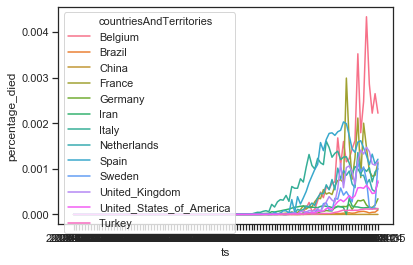

In [25]:
sns.lineplot(x='ts', y='percentage_died', data=df, hue='countriesAndTerritories')

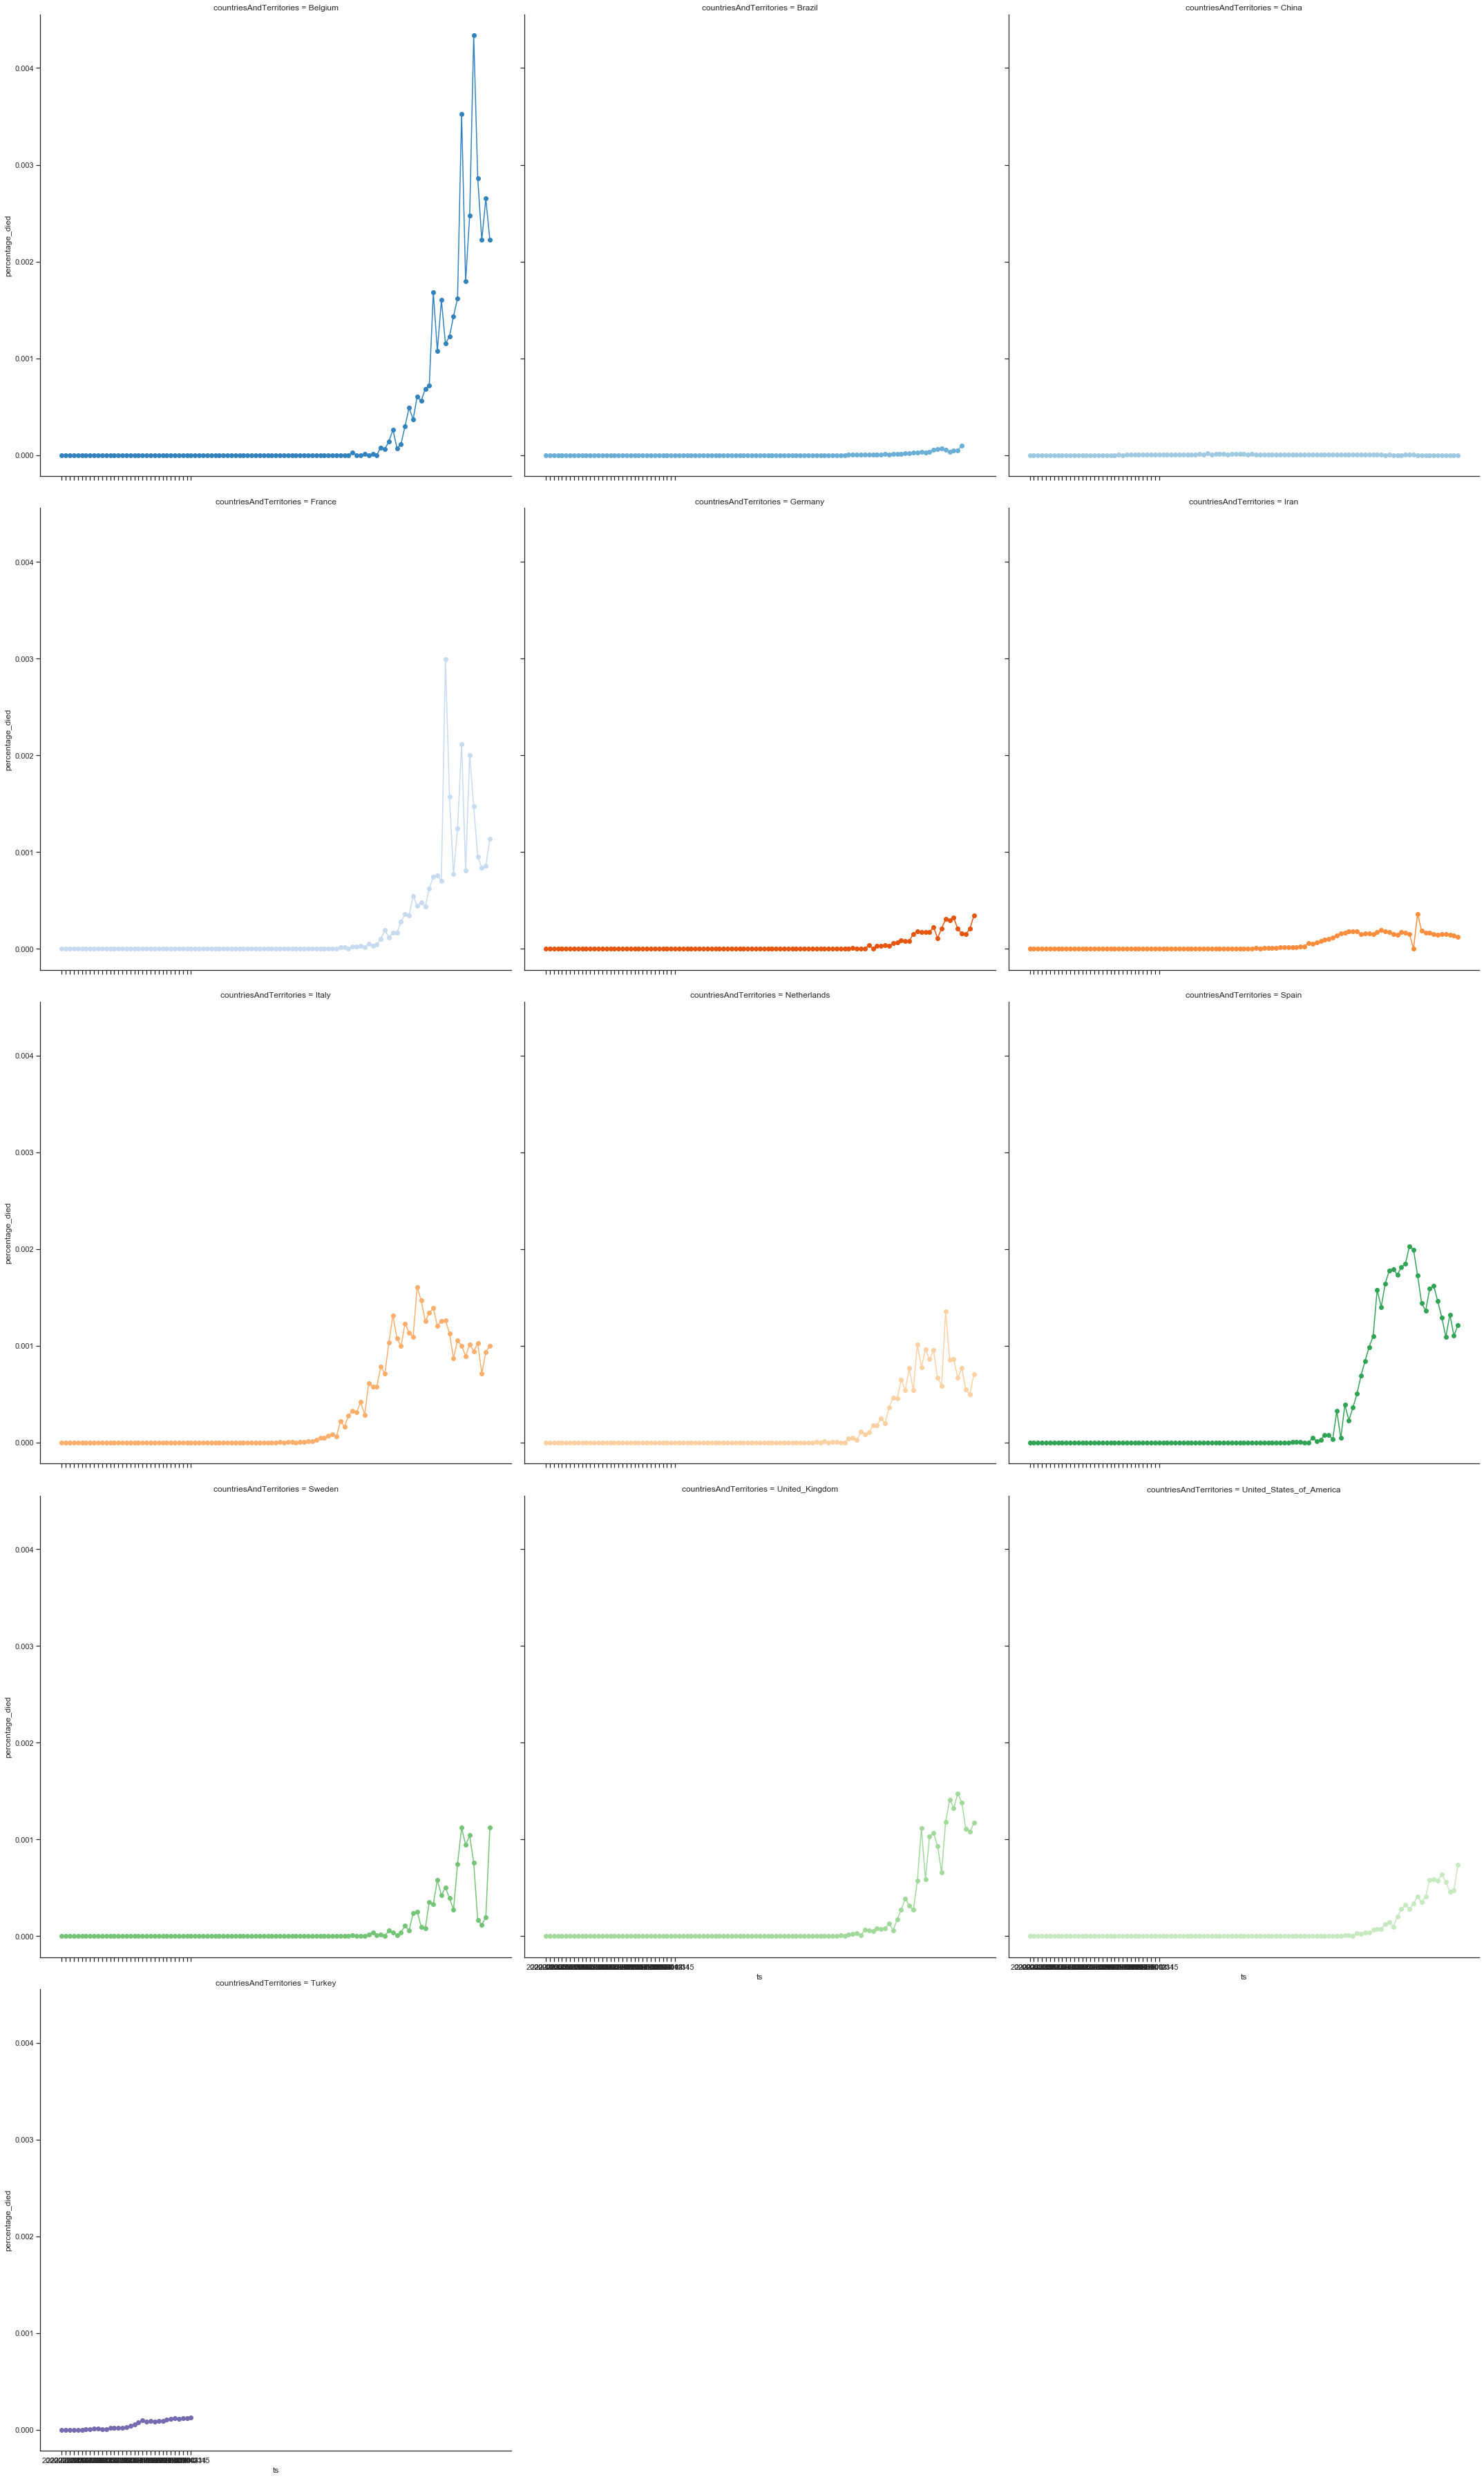

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="countriesAndTerritories", hue="countriesAndTerritories", palette="tab20c",
                     col_wrap=3, height=10)

grid.map(plt.plot, "ts", "percentage_died", marker="o")